<a href="https://colab.research.google.com/github/slowe8/MAT421/blob/main/ModuleBPart2Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT 421 Module B Homework 17.4 17.5
Name: Sean Lowe<br>
ASURITE: slowe8<br>
ASU ID: 1221120472<br>

**17.4 Lagrange Polynomial Interpolation***
Lagrange Polynomial interpolation is similar to a cubic spline interpolation, but instead of using piece-wise cubic functions, the lagrange method finds one smooth polynomial that goes through all of the data points. To perform a Lagrange interpolation, we can use the following method.

Predicted value of 7 with a Lagrange Polynomial:  6.023384406393099


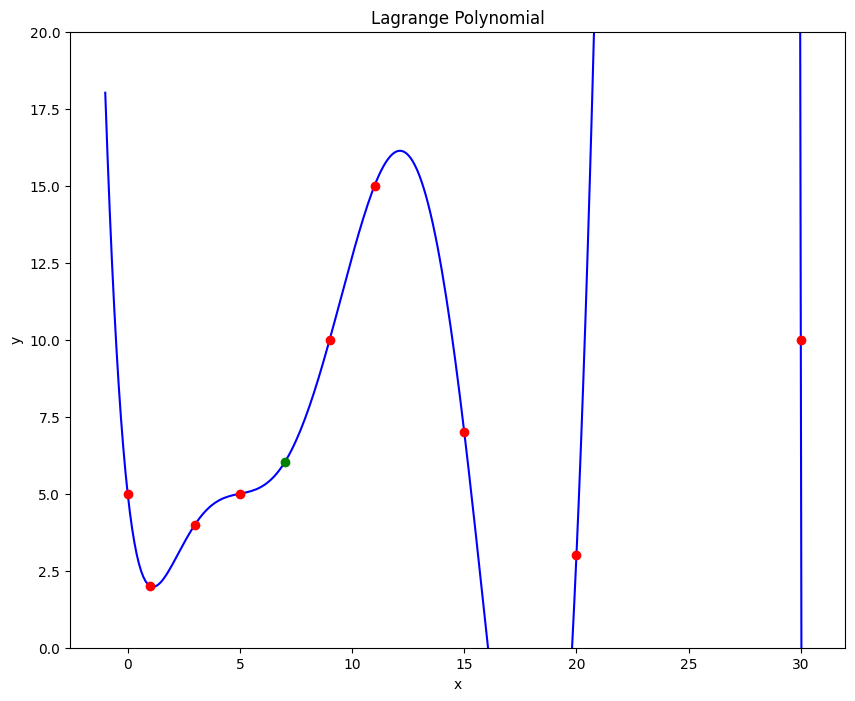

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# First lets define a dataset. We can use the same set from the previous sections
x = [0, 1, 3, 5, 9, 11, 15, 20, 30]
y = [5, 2, 4, 5, 10, 15, 7, 3, 10]

# Next we find the Lagrange polynomial function
lagrange_f = lagrange(x, y)

# Now, we can use the lagrange function to predict values outside of the dataset
y_pred = lagrange_f(7)
print('Predicted value of 7 with a Lagrange Polynomial: ', y_pred)

x_new = np.arange(-1.0, 30.5, 0.1)

# Next we can plot the figure
fig = plt.figure(figsize=(10,8))
plt.plot(x_new, lagrange_f(x_new), 'b', x, y, 'ro')
plt.plot(7, y_pred, 'go')
plt.title('Lagrange Polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(top=20, bottom=0)
plt.show()

This plot shows why a lagrange interpolation is better for data points that are more dense. We can see that in the beginning of the set, when points are closer together, the polynomial fits very well, however, when the points become farther apart, the polynomial becomes very large and not well-represenative.

**17.5 Newton's Polynomial Interpolation**
Newton's polynomial interpolation is another popular method of fitting a line ot a dataset. It is a recursive method that uses a tree of divided differences to estimate the line between two points. The tree can be arranged into a matrix that can be dynamically filled using the algorithm and the product is a n - 1 polynomial that contains every point. We can use the following method to perform a Newton Polynomial Interpolation:

Newton's Polynomial Interpolation of 7:  6.023384406392666


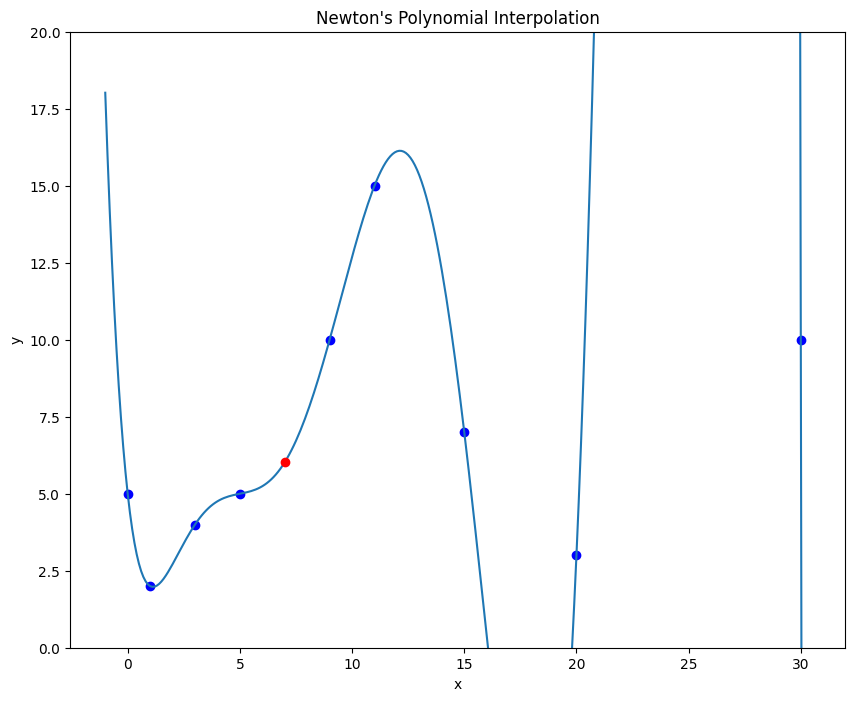

In [33]:
%matplotlib inline

def divided_diff(x, y):
  '''
  This function calculates the divided differences matrix that is used to
  plot the polynomial.

  The algorithm fills the matrix dynamically by using previous calculations in\
  the matrix to calculate the next divided differences
  '''

  n = len(y) # number of data points in the set

  coef_matrix = np.zeros([n,n]) # Initialize a coefficient matrix
  coef_matrix[:,0] = y

  for j in range(1,n):
    for i in range(n-j):
      coef_matrix[i][j] = \
      (coef_matrix[i+1][j-1] - coef_matrix[i][j-1]) / (x[i+j]-x[i])

  return coef_matrix

def newton_poly(coef, x, x_range):
    '''
    evaluate the newton polynomial
    at x
    '''
    n = len(x) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x_range -x[n-k])*p
    return p

x = np.array(x)
y = np.array(y)
coefficient_matrix = divided_diff(x, y)[0,:]
x_new = np.arange(-1.0, 30.5, 0.1)
y_new = newton_poly(coefficient_matrix, x, x_new)

y_pred = y_new[np.where(np.isclose(x_new, 7))]
print("Newton's Polynomial Interpolation of 7: ", y_pred[0])

plt.figure(figsize=(10,8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)
plt.plot(7, y_pred[0], 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Newton's Polynomial Interpolation")
plt.ylim(top=20, bottom=0)
plt.show()


Above, we can see how a newton polynomial behaves similar to a lagrange polynomial. Because both functions are one polynomial function, in places where there are gaps in data points the function greatly over or under predicts. We can evaluate how aggressively fit these polynomails are by calculating the difference between them.

In [39]:
lagrange_pred = lagrange_f(25)
newton_pred = y_new[np.where(np.isclose(x_new, 25))][0]

difference = lagrange_pred - newton_pred
print('Difference between Lagrange and Newton Polynomial interpolation: ', difference)

perc_diff = (abs(difference) / ((lagrange_pred + newton_pred)/2)) * 100
print('Percent difference between Lagrange and Newton Polynomial interpolation: ', perc_diff, '%')

Difference between Lagrange and Newton Polynomial interpolation:  3.8886582842678763e-10
Percent difference between Lagrange and Newton Polynomial interpolation:  1.479238620031177e-10 %


As seen above, the estimations are actually incredibly close, even at points where there is large gaps between data, however we would say that the newton polynomial has a better fit because it is closer to the actual data. This happens becasue for each data point in a set, the polynomial becomes higher-order which produces more aggresive oscillations. For this specific dataset, we might say that a spline interpolation is a better fit, or we could evaluate ranges of acceptable interpolations for a polynomial fit. For example, a lagrange interpolation is valid within 4 units on the x-axis. Otherwise, the oscillations become too large to be useful.